#### scientometrics
Assessment of the dynamics of publication activity in the field of natural language processing 
and deep learning using D1 and D2 indicators

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sc_df = pd.read_csv('DeepLearning_v.2.0.csv', encoding='latin1')

In [3]:
sc_df[:1]

,Field,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""machine learning"" AND (""nickel industry"" OR ""...",4,3,2,3,6,16,20,7,16,22,39,29,56,95,27.0


In [4]:
sc_df

,Field,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""machine learning"" AND (""nickel industry"" OR ""...",4,3,2,3,6,16,20,7,16,22,39,29,56,95,27.0
1,"farming, cultivation, tillage, tilling, husban...",0,0,0,2,0,0,0,2,1,1,4,3,14,34,400.0
2,"""deep learning"" AND (""buildings industry"" OR ""...",0,1,0,1,0,0,0,1,1,1,2,6,7,24,NaN
3,Deep Learning + healthcare industry,9,7,9,15,13,11,25,21,26,41,50,66,130,356,6.0
4,"Deep learning + project management, human mana...",3,2,0,5,4,2,4,2,9,8,11,10,20,33,NaN
5,"Deep learning + support decision, support deci...",0,1,0,0,1,0,0,0,2,2,5,7,17,47,NaN


In [5]:
sc_df['2018']

0     95
1     34
2     24
3    356
4     33
5     47
Name: 2018, dtype: int64

In [6]:
sc_df[:0]


,Field,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019


In [7]:
sc_df_counts=sc_df['Field'].value_counts()

<IPython.core.display.Javascript object>


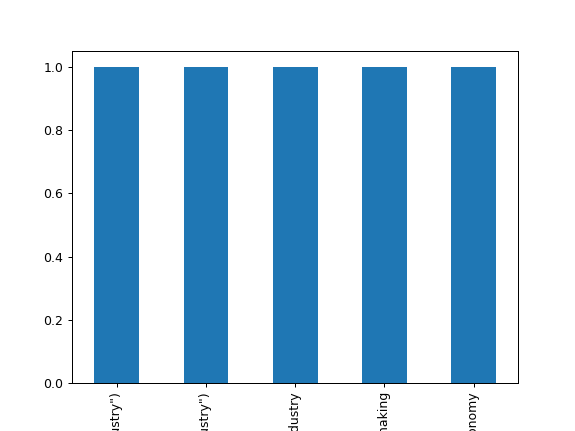

In [8]:
plt.figure(0)
sc_df_counts[:5].plot(kind='bar')

In [9]:
sc_df.keys()

Index(['Field', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [10]:
labels=np.array(sc_df['Field'])
labels.shape
labels

array(['"machine learning" AND ("nickel industry" OR "petroleum industry" OR "uranium industry" OR "copper industry" OR "zinc industry" OR "gold mining industry" OR "mineral industry" OR "gas industry" OR "coal industry")',
       'farming, cultivation, tillage, tilling, husbandry, land management, farm management, crofting; agribusiness, agronomics, agronomy',
       '"deep learning" AND ("buildings industry" OR "architecture industry" OR "construction industry" OR "domicile industry" OR "edifice industry" OR "erection industry" OR "fabric industry" OR "framework industry" OR "home industry")',
       'Deep Learning + healthcare industry',
       'Deep learning + project management, human management, human resourse management, department management',
       'Deep learning + support decision, support decision making'],
      dtype=object)

In [11]:
keys=np.array(sc_df.keys())

In [12]:
ka=np.array(keys.shape)
ka[0]-1

15

In [13]:
sc_df[keys[1:]]


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,3,2,3,6,16,20,7,16,22,39,29,56,95,27.0
1,0,0,0,2,0,0,0,2,1,1,4,3,14,34,400.0
2,0,1,0,1,0,0,0,1,1,1,2,6,7,24,NaN
3,9,7,9,15,13,11,25,21,26,41,50,66,130,356,6.0
4,3,2,0,5,4,2,4,2,9,8,11,10,20,33,NaN
5,0,1,0,0,1,0,0,0,2,2,5,7,17,47,NaN


In [14]:
n=1
ka=np.array(keys.shape)
scnum=sc_df.loc[n,keys[1:ka[0]-1]]
print(scnum)
y=np.array(scnum)
#x=np.arange(ka[0]-2)
x=keys[1:ka[0]-1]

print(y)
print(x)

2005     0
2006     0
2007     0
2008     2
2009     0
2010     0
2011     0
2012     2
2013     1
2014     1
2015     4
2016     3
2017    14
2018    34
Name: 1, dtype: object
[0 0 0 2 0 0 0 2 1 1 4 3 14 34]
['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018']


In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)

#X=x[:,np.newaxis]
#model.fit(X,y)
#h=model.predict(X)
#plt.scatter(X,y, color='black', marker='o')
#plt.plot(X,h,color='cyan' )
x = [int(i) for i in x]
x=np.array(x)
X=x[:,np.newaxis]
X

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18]])

Degree= 7.00
Mean squared error: 0.87
vatriance error: 0.99


C:\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6886528420009367e-18 / 1.1102230246251565e-16
  RuntimeWarning)


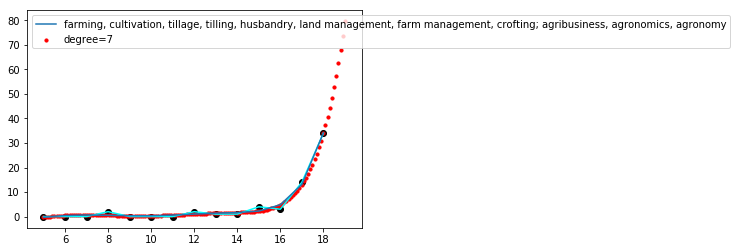

In [36]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

count=1



keys=np.array(sc_df.keys())
ka=np.array(keys.shape)
labels=np.array(sc_df['Field'])

#scnum=sc_df.loc[n,keys[1:ka[0]-1]]
scnum=sc_df.loc[count,keys[1:ka[0]-1]]
#print(scnum)
y=np.array(scnum)
#x=np.arange(ka[0]-2)
x=keys[1:ka[0]-1]

x = [int(i) for i in x]
x=np.array(x)

x=x-2000
X=x[:,np.newaxis]
#print(X)
#x2=np.linspace(x[0],x[-1]+1,100)
dotPerYear=10
x2=np.linspace(x[0],x[-1]+1,((x[-1]+1)-x[0])*dotPerYear)
##x2=np.linspace(x[0],x[-1],50)
#print(x2)
X2=x2[:,np.newaxis]
plt.figure(8)
plt.scatter(X,y, color='black', marker='o')
plt.plot(X,y,color='cyan' )
degree=7
poly=make_pipeline(PolynomialFeatures(degree),Ridge())
poly.fit(X,y)
y_pred=poly.predict(X)
y_pred2=poly.predict(X2)
print('Degree= %.2f' % degree)
print('Mean squared error: %.2f' % mean_squared_error(y,y_pred))
print('vatriance error: %.2f' % r2_score(y,y_pred))
    #plt.plot(X_train,y_pred,color='silver', linewidth=2, label='degree=%d' % degree)
#plt.scatter(X_train,y_pred,color=colors[count], s=10, marker='o', label='degree=%d' % degree)
plt.scatter(X2,y_pred2,s=10, marker='o', color='red', label='degree=%d' % degree)
plt.plot(X,y_pred,label= labels[count])
plt.legend(loc='upper left')
plt.show()

"machine learning" AND ("nickel industry" OR "petroleum industry" OR "uranium industry" OR "copper industry" OR "zinc industry" OR "gold mining industry" OR "mineral industry" OR "gas industry" OR "coal industry")
Degree= 7.00
Mean squared error: 27.40
variance error: 0.96


C:\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6886528420009367e-18 / 1.1102230246251565e-16
  RuntimeWarning)


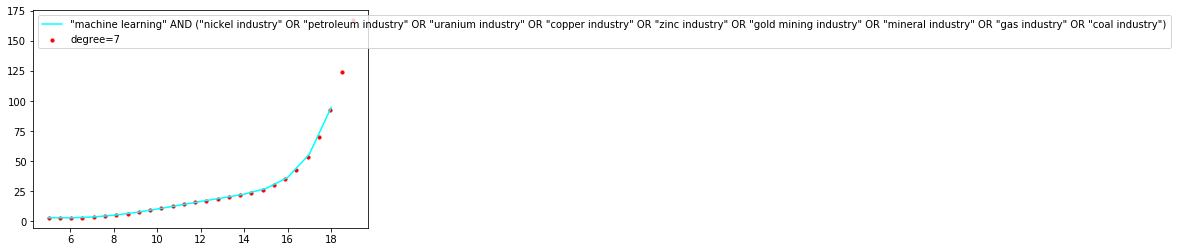

C:\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6886528420009367e-18 / 1.1102230246251565e-16
  RuntimeWarning)


"machine learning" AND ("nickel industry" OR "petroleum industry" OR "uranium industry" OR "copper industry" OR "zinc industry" OR "gold mining industry" OR "mineral industry" OR "gas industry" OR "coal industry")
Degree= 7.00
Mean squared error: 27.40
variance error: 0.96


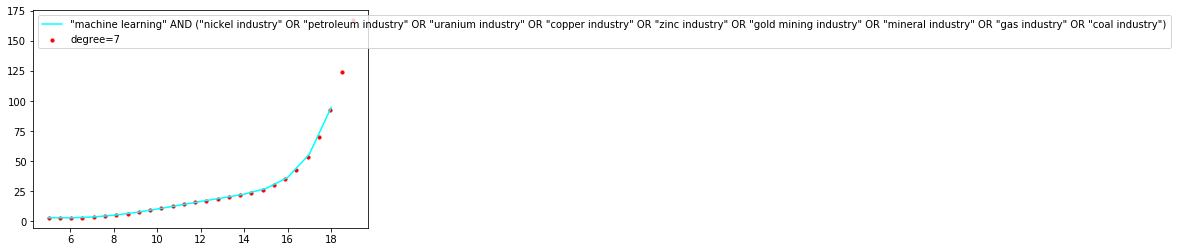

In [30]:
#Calculate regressions curves

%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

#read csv, 
sc_df = pd.read_csv('DeepLearning_v.2.0.csv', encoding='latin1')
keys=np.array(sc_df.keys())
ka=np.array(keys.shape)
labels=np.array(sc_df['Field'])

count=0       #number of row
dotPerYear=2  #dots per year after regression
degree=7

def plotting(a,b):
    c=a+b


def regCurve(count,dotPerYear,sc_df,degree):
    keys=np.array(sc_df.keys())
    ka=np.array(keys.shape)
    labels=np.array(sc_df['Field'])
    scnum=sc_df.loc[count,keys[1:ka[0]-1]]
    #print(scnum)
    y=np.array(scnum)
    #x=np.arange(ka[0]-2)
    x=keys[1:ka[0]-1]
    x = [int(i) for i in x]  #convert to integer
    x=np.array(x)
    x=x-2000
    X=x[:,np.newaxis]
    x2=np.linspace(x[0],x[-1]+1,((x[-1]+1)-x[0])*dotPerYear)
    X2=x2[:,np.newaxis]
    poly=make_pipeline(PolynomialFeatures(degree),Ridge())
    poly.fit(X,y)
    y_pred=poly.predict(X)

    y_pred2=poly.predict(X2)
    print(labels[count])
    print('Degree= %.2f' % degree)
    print('Mean squared error: %.2f' % mean_squared_error(y,y_pred))
    print('variance error: %.2f' % r2_score(y,y_pred))
    #print('variance error: %.2f' % r2_score(y,y_pred))
    mse=mean_squared_error(y,y_pred)
    r2=r2_score(y,y_pred)
    ##print('MSE, r2 : %.2f, %.2f' % mse % r2 %r2)
    #print('MSE:=', mse, 'r2=', r2)
    ##label='MSE:='+ mse+'r2='+ r2
    #plt.plot(X_train,y_pred,color='silver', linewidth=2, label='degree=%d' % degree)
    #plt.scatter(X_train,y_pred,color=colors[count], s=10, marker='o', label='degree=%d' % degree)
    plt.scatter(X2,y_pred2,s=10, marker='o', color='red', label='degree=%d' % degree )    #how to print multi argumentla string?
    plt.plot(X,y_pred,label= labels[count], color='cyan')
    #plt.plot(x,y, label= labels[count])
    plt.legend(loc='upper left')

plt.figure(8)
regCurve(count,dotPerYear,sc_df,degree)
plt.show()
    
#********
#labels=np.array(sc_df['Field'])
#keys=np.array(sc_df.keys())
#labels.shape
#labels
#count=0
#plt.figure(2)
#*********

#keys=np.array(sc_df.keys())
#ka=np.array(keys.shape)
#labels=np.array(sc_df['Field'])

#scnum=sc_df.loc[n,keys[1:ka[0]-1]]

scnum=sc_df.loc[count,keys[1:ka[0]-1]]
#print(scnum)
y=np.array(scnum)
#x=np.arange(ka[0]-2)
x=keys[1:ka[0]-1]

x = [int(i) for i in x]
x=np.array(x)

x=x-2000
X=x[:,np.newaxis]
#print(X)
#x2=np.linspace(x[0],x[-1]+1,100)
#dotPerYear=10
x2=np.linspace(x[0],x[-1]+1,((x[-1]+1)-x[0])*dotPerYear)
##x2=np.linspace(x[0],x[-1],50)
#print(x2)
X2=x2[:,np.newaxis]
#plt.figure(8)
#plt.scatter(X,y, color='black', marker='o')
#plt.plot(X,y,color='cyan' )
degree=7
poly=make_pipeline(PolynomialFeatures(degree),Ridge())
poly.fit(X,y)
y_pred=poly.predict(X)

y_pred2=poly.predict(X2)

print(labels[count])
print('Degree= %.2f' % degree)
print('Mean squared error: %.2f' % mean_squared_error(y,y_pred))
print('variance error: %.2f' % r2_score(y,y_pred))
#print('variance error: %.2f' % r2_score(y,y_pred))
mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
##print('MSE, r2 : %.2f, %.2f' % mse % r2 %r2)
#print('MSE:=', mse, 'r2=', r2)
##label='MSE:='+ mse+'r2='+ r2

    #plt.plot(X_train,y_pred,color='silver', linewidth=2, label='degree=%d' % degree)
#plt.scatter(X_train,y_pred,color=colors[count], s=10, marker='o', label='degree=%d' % degree)
plt.scatter(X2,y_pred2,s=10, marker='o', color='red', label='degree=%d' % degree )    #how to print multi argumentla string?
plt.plot(X,y_pred,label= labels[count], color='cyan')
#plt.plot(x,y, label= labels[count])
plt.legend(loc='upper left')
plt.show()

[ 0.00000000e+00 -3.68544200e-02  1.59737825e-01  3.71552252e-01
  5.92695349e-01  8.15443152e-01  1.03051782e+00  1.22764525e+00
  1.39639378e+00  1.52729395e+00  1.61323927e+00  1.65116811e+00
  1.64402662e+00  1.60301272e+00  1.55010111e+00  1.52084943e+00
  1.56748537e+00  1.76227489e+00  2.20117153e+00  3.00774672e+00
  4.33740118e+00  6.38185738e+00  9.37393304e+00  1.35925957e+01
  1.93682985e+01  2.70885965e+01  3.72040448e+01]
27.088596465946466


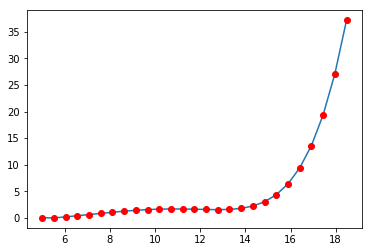

In [31]:
#calculate of derivatives
def deriv(a,b):
    return((b-a)/2)
#print(deriv(2,4)) 
#print(y.shape)

def plotDeriv(y,x, dotPerYear):
    de=np.zeros(np.array(y.shape))
    num=np.arange(np.array(y.shape)-2)
    #print(np.array(de.shape)[0]-1)
    for i in num:
        #print(i)
        de[i+1]=deriv(y[i],y[i+2])
        #print(de[i+1])
    
    de=de[0:np.array(de.shape)[0]-1]
    print(de)
    x_axis=(x[0:np.array(x.shape)[0]-1])
    #print(x_axis)
    print(de[np.array(x.shape)[0]-dotPerYear-1])
    #print(de[np.array(x.shape)[0]-dotPerYear+1])
    plt.figure(4)
    plt.plot(x_axis,de)
    plt.plot(x_axis,de,'or')
plotDeriv(y_pred2,x2, dotPerYear)   
#plotDeriv(y,x, 1)

In [32]:

#plt.figure(1)
#plt.plot(x,y, label= labels[n])
##plt.scatter(X_train,y_pred,color=colors[count], s=10, marker='o', label='degree=%d' % degree)
#plt.legend(loc='upper left')
#plt.show()

In [33]:
#ka

In [34]:
keys[1:ka[0]-1]

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018'], dtype=object)

In [35]:
for count, degree in enumerate ([2,5,9]):
    poly=make_pipeline(PolynomialFeatures(degree),Ridge())
    poly.fit(X_train,y_train)
    y_pred=poly.predict(X_train)
    print('Degree= %.2f' % degree)
    print('Mean squared error: %.2f' % mean_squared_error(y_train,y_pred))
    print('vatriance error: %.2f' % r2_score(y_train,y_pred))
    #plt.plot(X_train,y_pred,color='silver', linewidth=2, label='degree=%d' % degree)
    plt.scatter(X_train,y_pred,color=colors[count], s=10, marker='o', label='degree=%d' % degree)
    plt.legend(loc='lower left')
    plt.show()

NameError: name 'X_train' is not defined

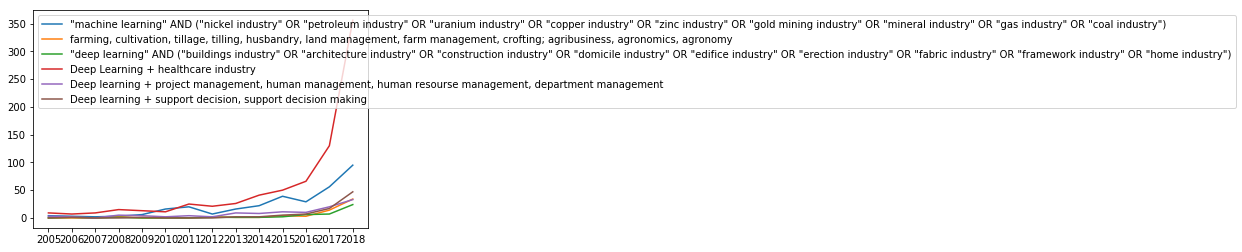

In [27]:
#Print publication activity

labels=np.array(sc_df['Field'])
keys=np.array(sc_df.keys())
#labels.shape
#labels
count=0
plt.figure(2)
for lab in labels:
    #print(lab)
    ka=np.array(keys.shape)
    scnum=sc_df.loc[count,keys[1:ka[0]-1]]
    #print(scnum)
    y=np.array(scnum)
    x=keys[1:ka[0]-1]
    #print(y)
    #print(x)
    plt.plot(x,y, label= labels[count])
    count=count+1
    #print(count)
plt.legend(loc='upper left')
plt.show()    

[4 3 2 3 6 16 20 7 16 22 39 29 56 95]
['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018']


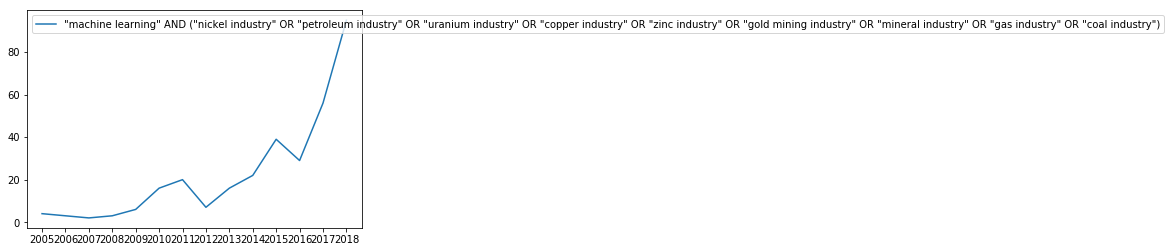

In [28]:
n=0
labels=np.array(sc_df['Field'])
#labels.shape
#labels
plt.figure(2)
ka=np.array(keys.shape)
scnum=sc_df.loc[0,keys[1:ka[0]-1]]
y=np.array(scnum)
#x=np.arange(ka[0]-2)
x=keys[1:ka[0]-1]

print(y)
print(x)

plt.plot(x,y, label= labels[n])
#plt.scatter(X_train,y_pred,color=colors[count], s=10, marker='o', label='degree=%d' % degree)
plt.legend(loc='upper left')
plt.show()